

# Project: TMDb Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This data set represents a movie database, and it contains information about 10,000 movies collected from The Movie Database (TMDb),including user ratings and revenue. Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters. There are some odd characters in the ‘cast’ column. The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time. 


### Question(s) for Analysis

1. What genres are most popular from year to year?
2. What kinds of properties are associated with movies that have high revenues?

In [1]:
# import statements for all of the packages that is needed

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

I will start by loading the data into the dataframe. Then i will observe it, and prepare the data for analysis by trimming and cleaning it up for better understanding and readability.


### General Properties


In [2]:
# Loading csv file into the dataframe and carrying out observations on the dataset.

df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.shape

(10866, 21)

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

It is observed that the dataset contains null values.

There are a total of 10866 rows and 21 columns.

There are 2 columns for budget and revenue, so i will be working with the budget_adj and revenue_adj columns.

The genres and cast columns have multiple values.

I will be cleaning the data for preparation of my analysis in the next step.


### Data Cleaning
In this next step, i will be cleaning the data. I will start by dropping unnecessary columns, then rename the 'budget_adj' and 'revenue_adj' columns for easy understanding I will remove duplicates and drop null values to avoid wrong analysis, then i will split the cast and genres columns, so as to enable me carry out analysis on them.
 

I will begin with dropping the columns that are not needed for this analysis for easy readability and understanding.

In [6]:
# Dropping columns not needed for analysis

df.drop(['imdb_id', 'homepage', 'tagline', 'overview', 'keywords', 'budget', 'revenue'], axis=1, inplace=True)
df.head()

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Next, i will be renaming the 'budget_adj' and 'revenue_adj' columns to budget and revenue respectively for easy understanding.

In [7]:
# Renaming budget_adj and revenue_adj columns for clarity

df.rename(columns = {'budget_adj':'budget', 'revenue_adj':'revenue'}, inplace = True)
df.head()

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget,revenue
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


The 'budget' and 'revenue' columns have been renamed

I would like to check for duplicate values in the dataset

In [8]:
# Checking for duplicates

df.duplicated().sum()

1

The dataset contains 1 duplicate, so i will drop the duplicate value since i will not be needing it.

In [9]:
# Dropping duplicate values

df.drop_duplicates()

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget,revenue
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,9.110700,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,8.654359,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,7.667400,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,7.404165,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,6.326804,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08


The budget and revenue columns contain zero values, so i will be dropping rows with zero values in these columns

In [10]:
# Dropping zero values from budget and revenue columns

df = df[(df[['budget','revenue']] != 0).all(axis=1)]
df.head()

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget,revenue
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [11]:
# Checking for null values

df.isnull().sum()

id                       0
popularity               0
original_title           0
cast                     4
director                 1
runtime                  0
genres                   0
production_companies    46
release_date             0
vote_count               0
vote_average             0
release_year             0
budget                   0
revenue                  0
dtype: int64

There are null values present here, so i will be removing them so they do not interfere with my analysis.

In [12]:
# Removing null values

df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3806 entries, 0 to 10848
Data columns (total 14 columns):
id                      3806 non-null int64
popularity              3806 non-null float64
original_title          3806 non-null object
cast                    3806 non-null object
director                3806 non-null object
runtime                 3806 non-null int64
genres                  3806 non-null object
production_companies    3806 non-null object
release_date            3806 non-null object
vote_count              3806 non-null int64
vote_average            3806 non-null float64
release_year            3806 non-null int64
budget                  3806 non-null float64
revenue                 3806 non-null float64
dtypes: float64(4), int64(4), object(6)
memory usage: 446.0+ KB


Null values have been dropped

I want to unnest the values in the genres column as they contain multiple values separated by pipe (|) characters.

In [13]:
# Unnesting genres column to split values into rows

df_genres = df.assign(genres=df.genres.str.split('|'))
df_genres = df_genres.genres.apply(pd.Series) \
    .merge(df_genres, right_index=True, left_index=True) \
    .drop(['genres'], axis=1) \
    .melt(id_vars=['id','popularity','original_title','cast','director','runtime','production_companies','release_date','vote_count','vote_average','release_year','budget', 'revenue'], value_name='genres') \
    .drop('variable', axis=1) \
    .dropna()
  
df_genres.head()

,id,popularity,original_title,cast,director,runtime,production_companies,release_date,vote_count,vote_average,release_year,budget,revenue,genres
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Action
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,Action
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,Action


The 'genres' column now have their values split into rows

I will be separating the values in the cast column just like i did with the genres column above.

In [14]:
# Unnesting cast column to split values into rows

df_cast = df_genres.assign(cast=df_genres.cast.str.split('|'))
df_cast = df_cast.cast.apply(pd.Series) \
    .merge(df_cast, right_index=True, left_index=True) \
    .drop(['cast'], axis=1) \
    .melt(id_vars=['id','popularity','original_title','genres','director','runtime','production_companies','release_date','vote_count','vote_average','release_year','budget', 'revenue'], value_name='cast') \
    .drop('variable', axis=1) \
    .dropna()
  
df_cast.head()

,id,popularity,original_title,genres,director,runtime,production_companies,release_date,vote_count,vote_average,release_year,budget,revenue,cast
0,135397,32.985763,Jurassic World,Action,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Chris Pratt
1,76341,28.419936,Mad Max: Fury Road,Action,George Miller,120,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Tom Hardy
2,262500,13.112507,Insurgent,Adventure,Robert Schwentke,119,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Shailene Woodley
3,140607,11.173104,Star Wars: The Force Awakens,Action,J.J. Abrams,136,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,Harrison Ford
4,168259,9.335014,Furious 7,Action,James Wan,137,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,Vin Diesel


The values in the cast columns are now split into different rows.

Now i have the data cleaned and ready for the exploratory data analysis process.

<a id='eda'></a>
## Exploratory Data Analysis




### Question 1. What genres are most popular from year to year?

### 1A. What is the total number of movies released each year?

In [32]:
# Count of movies released for each year in the dataset

movie_count = (df_genres[['release_year', 'id']]
             .groupby('release_year')
             .count())
            
print(movie_count)

               id
release_year     
1960           14
1961           24
1962           16
1963           19
1964           22
1965           15
1966           12
1967           39
1968           27
1969           10
1970           37
1971           39
1972           18
1973           31
1974           36
1975           21
1976           37
1977           57
1978           44
1979           40
1980           58
1981           67
1982           77
1983           93
1984          117
1985          113
1986          125
1987          131
1988          152
1989          139
1990          156
1991          150
1992          150
1993          199
1994          177
1995          219
1996          235
1997          254
1998          253
1999          310
2000          271
2001          328
2002          356
2003          310
2004          378
2005          432
2006          451
2007          432
2008          445
2009          468
2010          473
2011          498
2012          394
2013      

It is observed here that there is a general increase in the number of movies released over the years. The year 2014 had the highest number of movies released, while 1969 had the least.

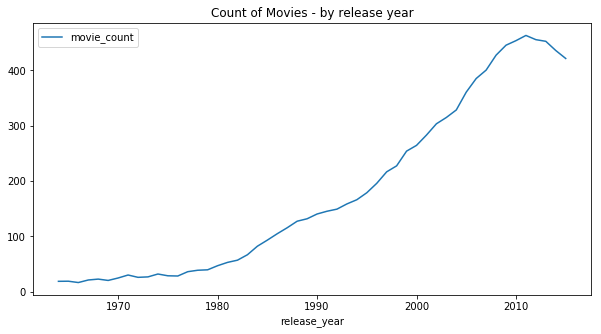

In [33]:
# Visualizing the count of movies released for each year

(movie_count.rolling(5).mean().rename(columns={'id':'movie_count'}).plot(figsize=(10,5),
title="Count of Movies - by release year"));

We can see the increase over the decades from the plot from less than 50 movies in 1970 to over 500 movies beyond 2010.

### 1B. What is the total number of movies for each genre?

In [34]:
# Count the total number of movies for each genre

gen_count = df_genres['genres'].value_counts()
print(gen_count)

Drama              1730
Comedy             1335
Thriller           1195
Action             1077
Adventure           743
Romance             658
Crime               650
Science Fiction     518
Horror              459
Family              417
Fantasy             395
Mystery             343
Animation           199
Music               131
History             128
War                 119
Western              52
Documentary          26
Foreign               9
TV Movie              1
Name: genres, dtype: int64


There are 20 genres of movies in total. It can be observed from the result that Drama movies has the highest in the genre category, and Foreign movies has the least.

### 1C. Which genres are most popular of all time?

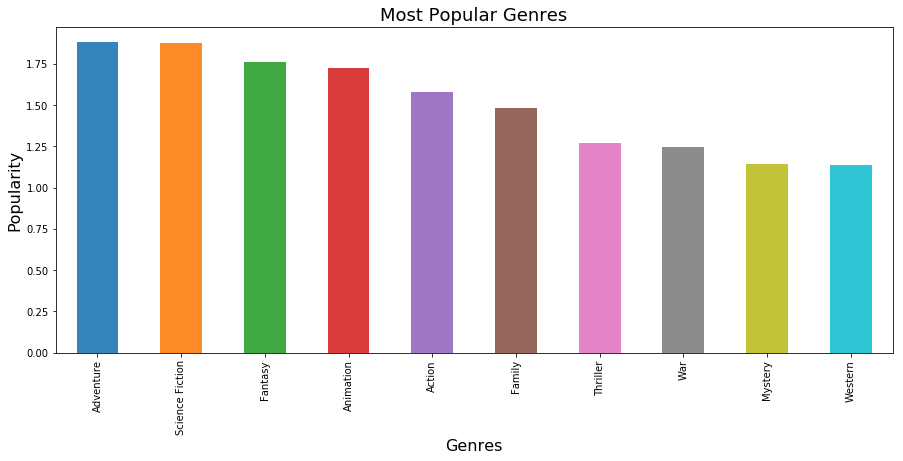

In [15]:
# Visualizing popularity based on genres

gen_pop = df_genres.groupby('genres')['popularity'].mean().sort_values(ascending=False).head(10)


gen_pop.plot(kind='bar', figsize=(15,6),alpha=0.9)
plt.title('Most Popular Genres',fontsize=18)
plt.xlabel('Genres',fontsize=16)
plt.ylabel('Popularity',fontsize=16);

Adventure genre is the most popular genre in this category.

### 1D. Which genres generated the most revenue?

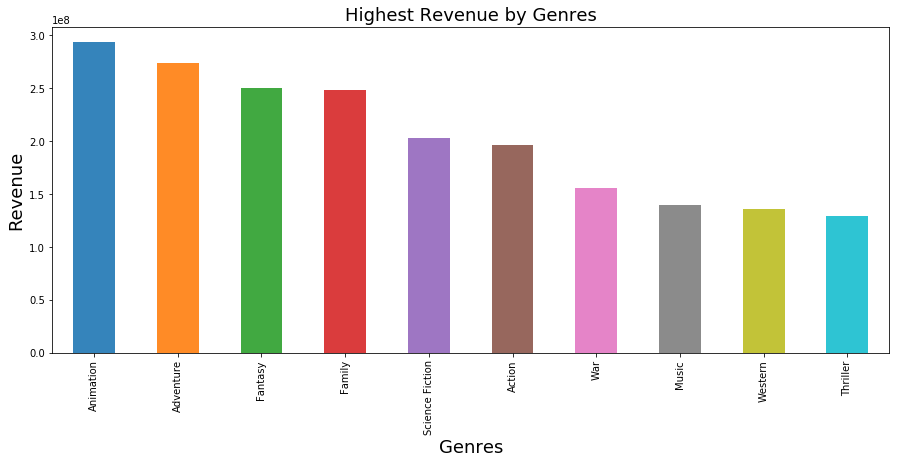

In [16]:
# Plotting a visualization on top revenue genres
gen_revenue = df_genres.groupby('genres')['revenue'].mean().sort_values(ascending=False).head(10)

gen_revenue.plot(kind='bar', figsize=(15,6),alpha=0.9)
plt.title('Highest Revenue by Genres',fontsize=18)
plt.xlabel('Genres',fontsize=18)
plt.ylabel('Revenue',fontsize=18);

Animation genre generated the highest revenue

### 1E. Which genres spent the most?

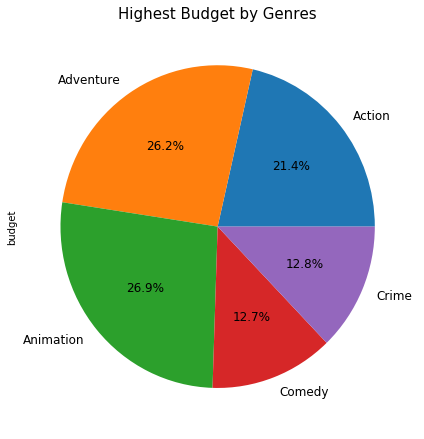

In [17]:
# Visualization of the genres that spent the most
gen_spent = df_genres.groupby('genres')['budget'].mean().head()

gen_spent.plot(kind='pie',autopct='%1.1f%%', figsize=(6,6), fontsize=12)
plt.tight_layout()
plt.title('Highest Budget by Genres', fontsize=15);

Animation spent the most with a total of 26.9% in this category

### 1F. Which genres has the highest vote count?

In [18]:
# Vote count for genres category

gen_count = df_genres.groupby('genres')['vote_count'].count().sort_values(ascending=False)
print(gen_count)

genres
Drama              1730
Comedy             1335
Thriller           1195
Action             1077
Adventure           743
Romance             658
Crime               650
Science Fiction     518
Horror              459
Family              417
Fantasy             395
Mystery             343
Animation           199
Music               131
History             128
War                 119
Western              52
Documentary          26
Foreign               9
TV Movie              1
Name: vote_count, dtype: int64


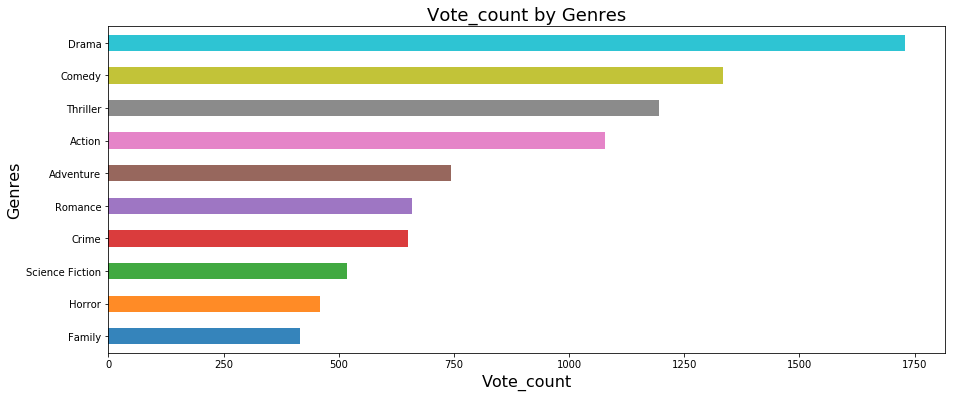

In [19]:
# Plotting a visualization on top_rated genres

gen_count = df_genres.groupby('genres')['vote_count'].count().sort_values(ascending=True).tail(10)
gen_count.plot(kind='barh', figsize=(15,6),alpha=0.9)
plt.title('Vote_count by Genres',fontsize=18)
plt.xlabel('Vote_count',fontsize=16)
plt.ylabel('Genres',fontsize=16);

Drama genre has the highest vote_count with a total of 1730 votes

### Question 2. What kinds of properties are associated with movies that have high revenues?

### 2A. What movies generated the highest revenue?

In [20]:
# Top 5 movies that generated the highest revenue

top_movie=df.groupby('original_title')['revenue'].mean().sort_values(ascending=False).head()
print(top_movie)

original_title
Avatar          2.827124e+09
Star Wars       2.789712e+09
Titanic         2.506406e+09
The Exorcist    2.167325e+09
Jaws            1.907006e+09
Name: revenue, dtype: float64


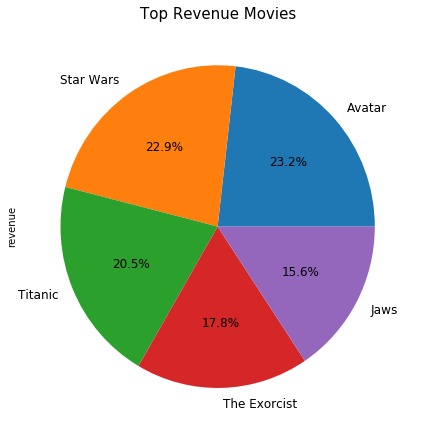

In [21]:
# Visualization on the top 5 movies that generated the most revenue

top_movie=df.groupby('original_title')['revenue'].mean().sort_values(ascending=False).head()
top_movie.plot(kind='pie',autopct='%1.1f%%', figsize=(6,6), fontsize=12)
plt.tight_layout()
plt.title('Top Revenue Movies', fontsize=15);

The movie 'Avatar' generated the highest revenue

### 2B Which movie title had the highest budget

In [22]:
# Top 10 movies that spent the most

top_spent=df_cast.groupby('original_title')['budget'].mean().sort_values(ascending=False).head(10)
print(top_spent)

original_title
The Warrior's Way                              4.250000e+08
Pirates of the Caribbean: On Stranger Tides    3.683713e+08
Pirates of the Caribbean: At World's End       3.155006e+08
Superman Returns                               2.920507e+08
Titanic                                        2.716921e+08
Spider-Man 3                                   2.713305e+08
Tangled                                        2.600000e+08
Avengers: Age of Ultron                        2.575999e+08
Harry Potter and the Half-Blood Prince         2.541001e+08
Waterworld                                     2.504192e+08
Name: budget, dtype: float64


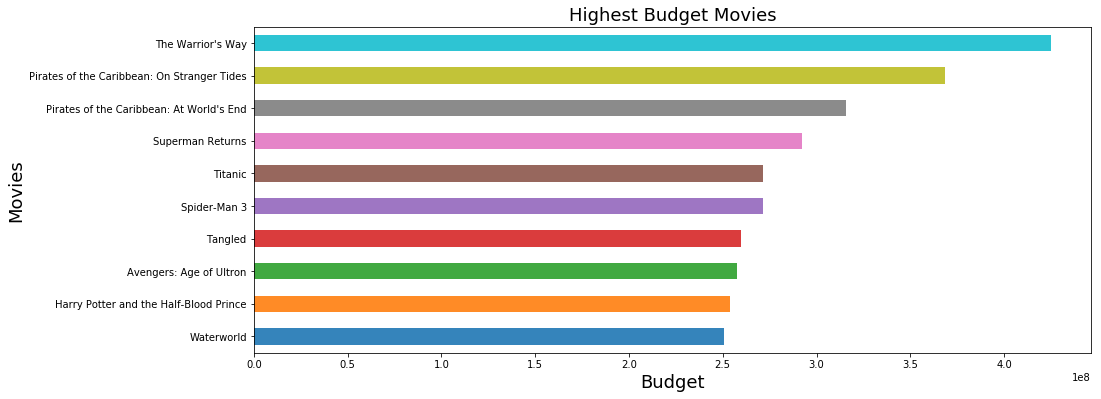

In [25]:
# Plotting a visualization on top budget movies

top_spent = df_cast.groupby('original_title')['budget'].mean().sort_values(ascending=True).tail(10)
top_spent.plot(kind='barh', figsize=(15,6),alpha=0.9)
plt.title('Highest Budget Movies',fontsize=18)
plt.xlabel('Budget',fontsize=18)
plt.ylabel('Movies',fontsize=18);

The Warrior's Way has the highest budget for the movie category.

### 2C. Which movies are the most popular of all time?

In [26]:
# Display the top 10 most popular movies and the revenue generated

df_cast.groupby(['revenue', 'original_title'], as_index=False)['popularity'].mean().sort_values( by='popularity', ascending=False).head(10)

,revenue,original_title,popularity
3793,1.392446e+09,Jurassic World,32.985763
3409,3.481613e+08,Mad Max: Fury Road,28.419936
3624,5.726906e+08,Interstellar,24.949134
3701,7.122911e+08,Guardians of the Galaxy,14.311205
3256,2.716190e+08,Insurgent,13.112507
3679,6.583651e+08,Captain America: The Winter Soldier,12.971027
3803,2.789712e+09,Star Wars,12.037933
2045,7.252661e+07,John Wick,11.422751
3799,1.902723e+09,Star Wars: The Force Awakens,11.173104
3691,6.927528e+08,The Hunger Games: Mockingjay - Part 1,10.739009


Jurassic World is the most popular movie of all time

### 2D. Is there a relation between Popularity and Budget?

In [27]:
def cut_levels(column_name):
    
    """categorizing columns into different levels """

# get the min, max and quantile values
    df_min=df_cast[column_name].min()
    first_qtile=df_cast[column_name].quantile(0.25)
    second_qtile=df_cast[column_name].quantile(0.50)
    third_qtile=df_cast[column_name].quantile(0.75)
    df_max=df_cast[column_name].max()
# get bin edges that will be used for grouping different levels
    bin_edges=[df_min, first_qtile, second_qtile, third_qtile, df_max]
# category names for the different levels  
    bin_names=['low','medium','moderately_high','high']
# creating column for budget_levels
    return pd.cut(df_cast[column_name], bin_edges, labels=bin_names)                                 

df_cast['budget_levels']=cut_levels('budget')

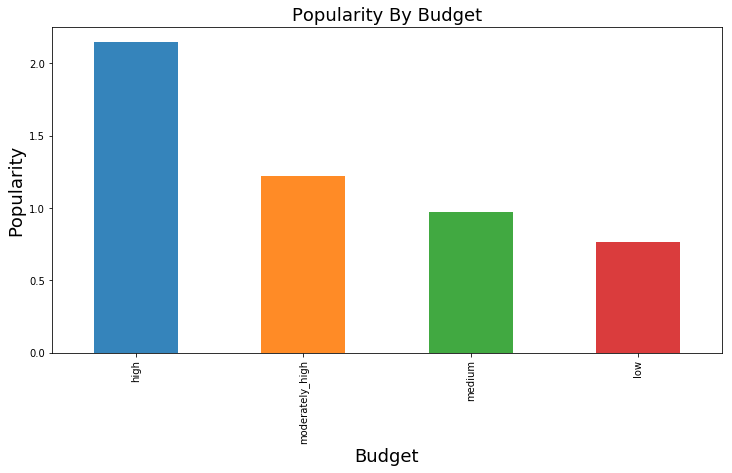

In [42]:
df_budget = df_cast.groupby('budget_levels')['popularity'].mean().sort_values(ascending=False)
df_budget.plot(kind='bar', figsize=(12,6),alpha=0.9)
plt.title('Popularity By Budget',fontsize=18)
plt.xlabel('Budget',fontsize=18)
plt.ylabel('Popularity',fontsize=18);

We can see that the movies with higher budget are most popular

### 2E. Is there a relation between Popularity and Revenue?

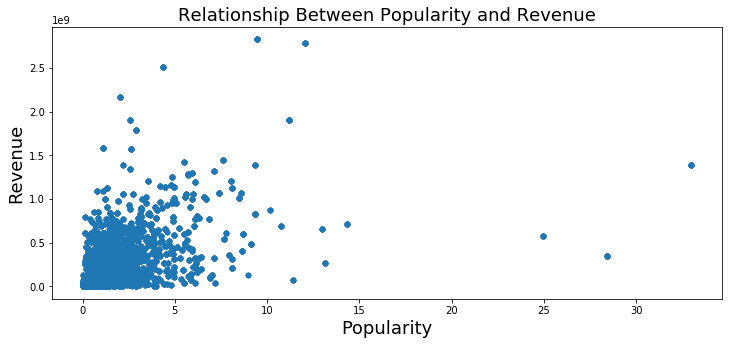

In [49]:
# Visualizing relationship between Revenue and Popularity

df_cast.plot(x='popularity',y='revenue',kind='scatter', figsize=(12, 5))
plt.xlabel('Popularity',fontsize=18)
plt.ylabel('Revenue',fontsize=18)
plt.title('Relationship Between Popularity and Revenue', fontsize=18)
plt.show()

It is a positive relationship that exists between Popularity and Revenue. This indicates that the level of popularity on a movie can influence its revenue.

### 2F. Is there a relation between Budget and Revenue?

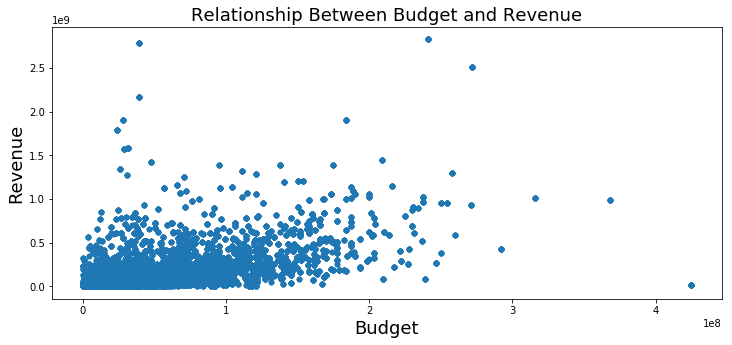

In [51]:
# Visualizing relationship between Revenue and Budget

df_cast.plot(x='budget',y='revenue',kind='scatter', figsize=(12, 5))
plt.xlabel('Budget',fontsize=18)
plt.ylabel('Revenue',fontsize=18)
plt.title('Relationship Between Budget and Revenue', fontsize=18)
plt.show();

A positive relationship exists between Budget and Revenue, which indicates that movies with higher budget is likely to generate more revenue.

<a id='conclusions'></a>
## Conclusions

After trimming and cleaning the dataset, I was able to carry ouy my analysis on the TMDb Movie data.

It was observed from the dataset that the number of movies progressed over the years.

Also, independent variables like genres and revenue are greatly influenced by dependent variables like popularity and ratings.

It is also observed from the analysis that there is a positive correlation between revenue and budget, which implies that movies with higher budget generates higher revenue.

In all, i would suggest that movies released should have strong 'online' presence and 'market' presence as well, so as to get better ratings and popularity, in order to generate more revenue.


## Limitations

The dataset contains a lot of Nan and 0 values, so in order for me to carry out my analysis, i had to drop so many rows. The dataset initially had 10,866 rows, and i ended up working on just about 3,806 rows. This means the data was not sufficient enough.



In [52]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0